### Multicollineariteit (VIF)


In [1]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# reads sensor file
df = pd.read_excel("/Users/wardmestdagh/Documents/HIRB/THESIS/DOCUMENTEN PURATOS/SENSOR DATA/sensordata (09-2022_06-2023).xlsx")

# input features we will use
input_features = ['RMSVibration.mean', 'Temperature.mean', 'SpeedPeak.mean', 
                  'Kurtosis.mean', 'MaximumAbsoluteVibration.mean', 
                  'RMSAcceleration.mean', 'Skewness.mean']

# calculates the VIF value for each input feature
vif_data = df[input_features]
vif_values = pd.DataFrame()
vif_values['Feature'] = vif_data.columns
vif_values['VIF'] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

# prints VIF values
print(vif_values)


                         Feature         VIF
0              RMSVibration.mean  271.148556
1               Temperature.mean    2.541623
2                 SpeedPeak.mean    3.828622
3                  Kurtosis.mean    1.306935
4  MaximumAbsoluteVibration.mean  316.668220
5           RMSAcceleration.mean   10.391644
6                  Skewness.mean    1.096251


In [13]:
# input features we will use
input_features = ['RMSVibration.mean', 'Temperature.mean', 'SpeedPeak.mean', 
                  'Kurtosis.mean',
                  'RMSAcceleration.mean', 'Skewness.mean']

# calculates the VIF value for each input feature
vif_data = df[input_features]
vif_values = pd.DataFrame()
vif_values['Feature'] = vif_data.columns
vif_values['VIF'] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

# prints VIF values
print(vif_values)


                Feature       VIF
0     RMSVibration.mean  3.945122
1      Temperature.mean  1.919124
2        SpeedPeak.mean  3.816147
3         Kurtosis.mean  1.023251
4  RMSAcceleration.mean  2.261664
5         Skewness.mean  1.011687


### Boxplots

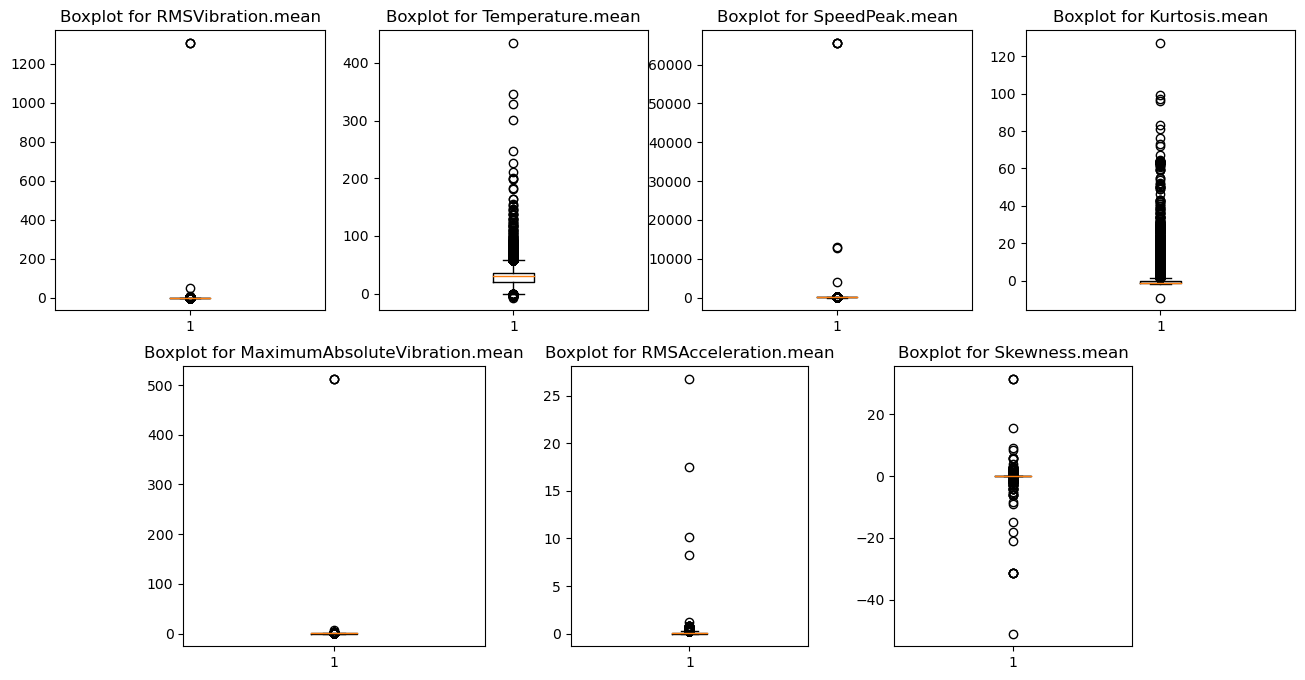

In [44]:
import matplotlib.pyplot as plt

features = ['RMSVibration.mean', 'Temperature.mean', 'SpeedPeak.mean', 
                  'Kurtosis.mean', 'MaximumAbsoluteVibration.mean', 
                  'RMSAcceleration.mean', 'Skewness.mean']
            
            
# creates a plotconfiguration of a 4x2 matrix
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# deletes the lower-right subplot
fig.delaxes(axes[1, 3])

for i, feature in enumerate(features):
    # determine the subplot position
    row = i // 4
    col = i % 4

    # gets the axis for the current subplot
    ax = axes[row, col]

    # collects the feature values
    x = df[feature].values

    # creates a boxplot
    ax.boxplot(x)
    ax.set_title('Boxplot for {}'.format(feature))
    

# moves the subplots on the second row slightly to the right
pos = axes[1, 0].get_position()
pos.x0 += 0.08  
pos.x1 += 0.1 
axes[1, 0].set_position(pos)

pos = axes[1, 1].get_position()
pos.x0 += 0.12  
pos.x1 += 0.1
axes[1, 1].set_position(pos)

pos = axes[1, 2].get_position()
pos.x0 += 0.12 
pos.x1 += 0.1  
axes[1, 2].set_position(pos)


# saves the figure as a PDF file
plt.savefig('boxplots.pdf')



plt.show()



### Histograms

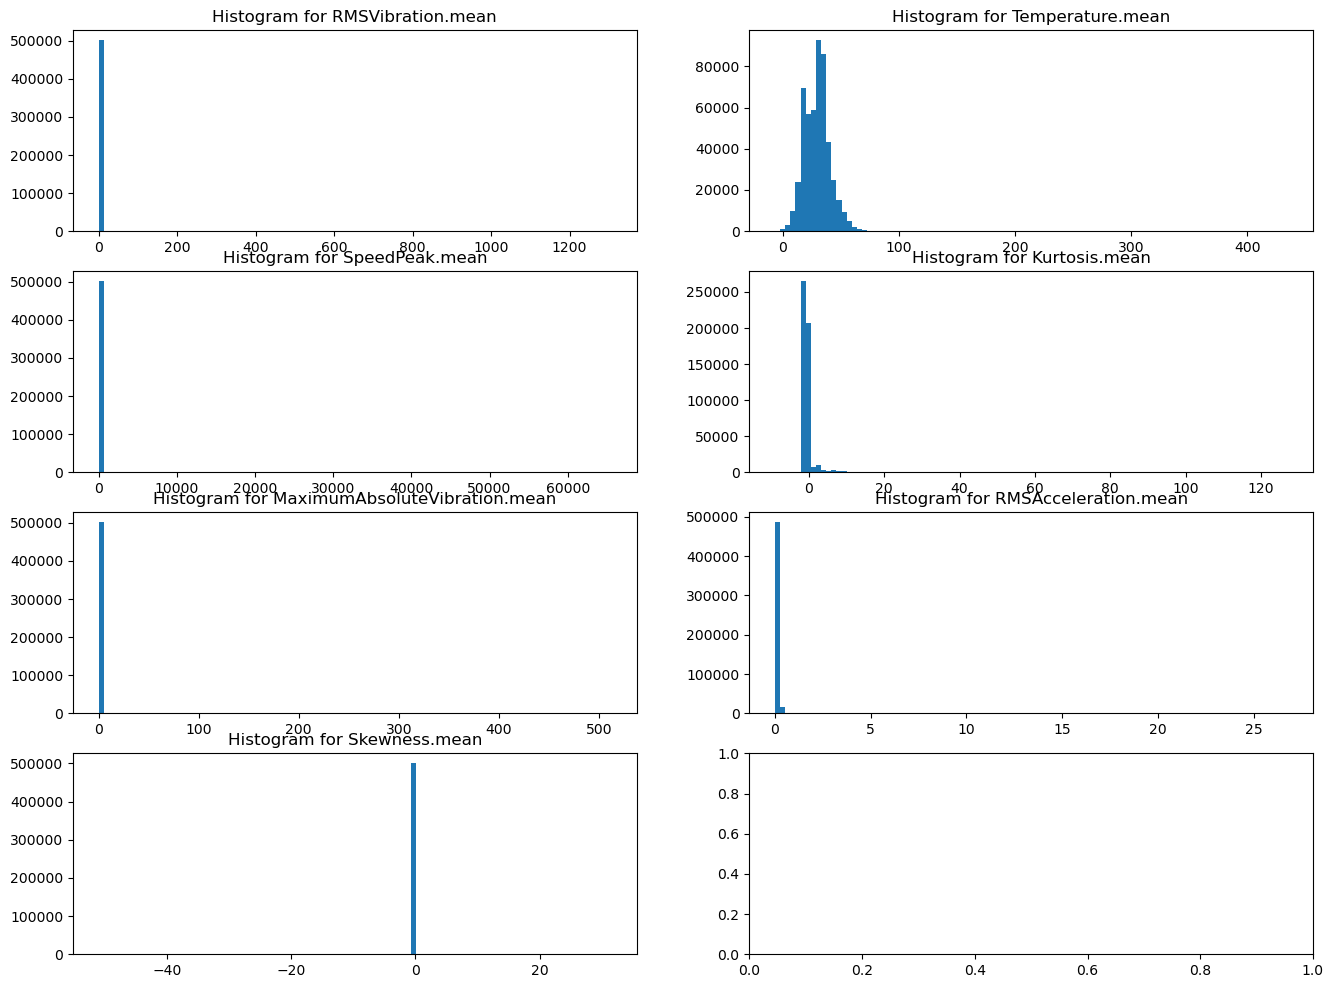

In [11]:
import matplotlib.pyplot as plt

features = ['RMSVibration.mean', 'Temperature.mean', 'SpeedPeak.mean', 
            'Kurtosis.mean', 'MaximumAbsoluteVibration.mean', 
            'RMSAcceleration.mean', 'Skewness.mean']

# creates a plotconfiguration of a 4x2 matrix
fig, axs = plt.subplots(4, 2, figsize=(16, 12))

# flattens the axs array for easier iteration
axs = axs.flatten()

for i, feature in enumerate(features):
    # collects the feature values
    x = df[feature].values

    # creates a histogram
    bin_range = (x.min(), x.max())  
    axs[i].hist(x, bins=100, range=bin_range)  
    axs[i].set_title('Histogram for {}'.format(feature))

plt.show()
